In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # per il caricamento di tips
from sklearn.linear_model import LinearRegression, RANSACRegressor

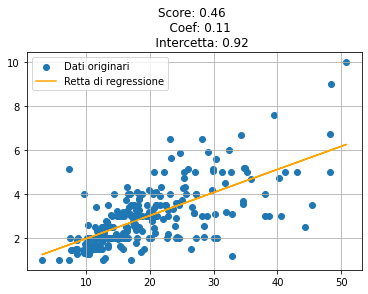

[0.92026961]


In [4]:
# Carico il dataset
df = sns.load_dataset('tips')
# Esercizio 16.1
lin_reg = LinearRegression()
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values.reshape(-1, 1)
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
score = lin_reg.score(X, y)

plt.scatter(X, y, label='Dati originari')
plt.plot(X, y_pred, color='orange', label='Retta di regressione')
plt.legend()
plt.grid()
plt.title(f'''Score: {round(score, 2)} 
    Coef: {round(lin_reg.coef_[0][0], 2)} 
    Intercetta: {round(lin_reg.intercept_[0], 2)}''')
plt.show()

##### Soluzione esercizio 16.2

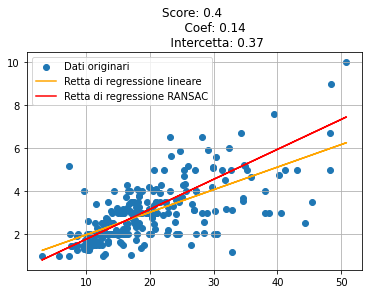

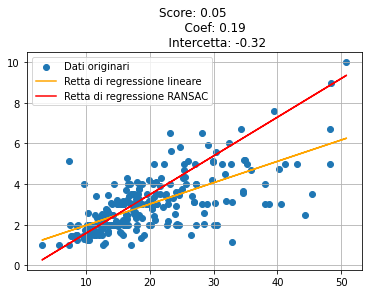

In [6]:
def fit_plot_ransac(X, y, y_pred, ran_reg, n_iters=3):
    """ Fitta e plotta un ransac.
    """
    for _ in range(n_iters):
        ran_reg = RANSACRegressor()
        ran_reg.fit(X, y)
        score = ran_reg.score(X, y)
        y_pred_ran = ran_reg.predict(X)
        plt.scatter(
            X,
            y,
            label='Dati originari')
        plt.plot(
            X,
            y_pred,
            color='orange',
            label='Retta di regressione lineare')
        plt.plot(
            X,
            y_pred_ran,
            color='red',
            label='Retta di regressione RANSAC')
        plt.legend()
        plt.grid()
        plt.title(f'''Score: {round(score, 2)} 
            Coef: {round(ran_reg.estimator_.coef_[0][0], 2)} 
            Intercetta: {round(ran_reg.estimator_.intercept_[0], 2)}''')
        plt.show()

ran_reg = RANSACRegressor()
fit_plot_ransac(X, y, y_pred, ran_reg, n_iters=2)